In [82]:
import pandas as pd
import pandas_profiling as pp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df = pd.read_csv("midterm_data_2.csv")
df = df.drop("row", axis = 1)
df.head()

,response,feat.a,feat.b,feat.c,feat.d,feat.e,feat.f,feat.g,feat.h,feat.i
0,1,-0.681427,-5.493698,b,0.0,-0.800615,-4.427602,z,10.254199,-0.828073
1,1,0.309468,-5.559933,d,1.0,-1.155514,-0.799094,x,9.084749,-1.109698
2,1,5.676125,-4.026970,b,1.0,-3.396331,-0.631966,y,8.753848,-3.417417
3,1,1.211525,-4.198263,a,1.0,-1.894569,-16.273262,y,12.191295,-1.904801
4,1,1.387863,-7.824014,c,1.0,4.696980,-22.208877,z,9.626686,4.715903


In [3]:
eda = pp.ProfileReport(df)
eda.to_file("midterm2_initial.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [61]:
df = df.fillna(df.median())

C:\Users\matth\AppData\Local\Temp/ipykernel_11976/3493596106.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.median())


In [62]:
df = pd.get_dummies(df)

In [63]:
df["response"] = df["response"].astype("category")

In [7]:
eda = pp.ProfileReport(df)
eda.to_file("midterm2_processed.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X = df.iloc[:,1:]
y = df.iloc[:,:1]

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=101)

In [67]:
X_train

,feat.a,feat.b,feat.d,feat.e,feat.f,feat.h,feat.i,feat.c_a,feat.c_b,feat.c_c,feat.c_d,feat.g_x,feat.g_y,feat.g_z
968,0.767383,-5.152486,1.0,4.698983,3.782216,8.833376,4.646257,0,0,1,0,0,1,0
205,-0.428741,-2.355008,1.0,0.302588,-8.706767,12.470171,0.243201,0,1,0,0,0,0,1
231,0.729041,-1.069498,1.0,1.836253,-5.205855,12.177760,1.863613,0,0,0,1,0,0,1
147,3.063750,-2.204384,1.0,-0.393614,-12.184535,10.133663,-0.489800,0,1,0,0,0,1,0
531,-0.519001,-3.360978,1.0,-1.025356,-21.881031,7.331405,-1.074075,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,5.110012,-2.770558,1.0,2.938986,-15.433695,10.117951,2.873882,0,1,0,0,0,1,0
838,1.168645,-1.901514,0.0,0.203994,-7.300704,8.540716,0.124096,0,1,0,0,0,1,0
337,0.397657,-6.165239,1.0,-1.516048,-10.910291,10.687109,-1.510253,0,0,1,0,0,0,1
523,0.172164,-4.473905,0.0,2.133786,-13.002548,8.696168,2.103452,0,0,0,1,0,1,0


In [68]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

mod = sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.Binomial()).fit()

In [69]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                  750
Model:                            GLM   Df Residuals:                      737
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -268.57
Date:                Tue, 22 Nov 2022   Deviance:                       537.14
Time:                        18:47:14   Pearson chi2:                 9.53e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4836
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8430      0.429      4.292      0.000       1.001       2.685
feat.a         0.0050      0.037      0.136      0.892      -0.067       0.077
feat.b        -0.0584      0.074     -0.790      0.430      -0.203       0.087
feat.d         0.6477      0.220      2.941      0.003       0.216       1.079
feat.e        -4.7070      2.958     -1.591      0.112     -10.505       1.091
feat.f         0.3482      0.026     13.562      0.000       0.298       0.398
feat.h        -0.0822      0.055     -1.490      0.136      -0.190       0.026
feat.i         4.7236      2.960      1.596      0.111      -1.078      10.526
feat.c_a       0.6930      0.222      3.115      0.002       0.257       1.129
feat.c_b       0.3469      0.199      1.742      0.081      -0.043       0.737
feat.c_c       0.1691      0.230      0.734      0.463      -0.282       0.621
feat.c_d       0.6340      0.226      2.802      0.005       0.190       1.078
feat.g_x       1.2340      0.224      5.503      0.000       0.794       1.674
feat.g_y      -0.1905      0.196     -0.970      0.332      -0.575       0.194
feat.g_z       0.7995      0.221      3.623      0.000       0.367       1.232
==============================================================================
"""

In [74]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
X_train_r = X_train.loc[:, ~X_train.columns.isin(['feat.a', 'feat.b', 'feat.e', 'feat.i', 'feat.h'])]
X_test_r = X_test.loc[:, ~X_test.columns.isin(['feat.a', 'feat.b', 'feat.e', 'feat.i', 'feat.h'])]

reduced_mod = sm.GLM(y_train, sm.add_constant(X_train_r), family=sm.families.Binomial()).fit()

In [75]:
reduced_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                  750
Model:                            GLM   Df Residuals:                      742
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -271.43
Date:                Tue, 22 Nov 2022   Deviance:                       542.86
Time:                        18:48:07   Pearson chi2:                 1.04e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4796
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4368      0.146      9.859      0.000       1.151       1.722
feat.d         0.6650      0.217      3.060      0.002       0.239       1.091
feat.f         0.3431      0.025     13.630      0.000       0.294       0.392
feat.c_a       0.5624      0.195      2.889      0.004       0.181       0.944
feat.c_b       0.2252      0.175      1.290      0.197      -0.117       0.567
feat.c_c       0.0668      0.201      0.333      0.739      -0.327       0.460
feat.c_d       0.5825      0.203      2.875      0.004       0.185       0.980
feat.g_x       1.1232      0.177      6.360      0.000       0.777       1.469
feat.g_y      -0.3334      0.155     -2.148      0.032      -0.638      -0.029
feat.g_z       0.6470      0.162      3.986      0.000       0.329       0.965
==============================================================================
"""

In [77]:
y1 = mod.predict(sm.add_constant(X_train))
y2 = mod.predict(sm.add_constant(X_test))
y3 = reduced_mod.predict(sm.add_constant(X_train_r))
y4 = reduced_mod.predict(sm.add_constant(X_test_r))

In [78]:
from sklearn import metrics

In [79]:
fpr1, tpr1, _ = metrics.roc_curve(y_train,  y1)
fpr2, tpr2, _ = metrics.roc_curve(y_test,  y2)
fpr3, tpr3, _ = metrics.roc_curve(y_train,  y3)
fpr4, tpr4, _ = metrics.roc_curve(y_test,  y4)
auc1 = metrics.auc(fpr1, tpr1)
auc2 = metrics.auc(fpr2, tpr2)
auc3 = metrics.auc(fpr3, tpr3)
auc4 = metrics.auc(fpr4, tpr4)

In [80]:
from sklearn.metrics import accuracy_score

In [83]:
a1 = 0
a2 = 0
a3 = 0
a4 = 0
for t in np.linspace(0,1,101):
    y_pred1 = np.where(y1>t, 1, 0)
    if accuracy_score(y_train, y_pred1) > a1:
        a1 = accuracy_score(y_train, y_pred1)
for t in np.linspace(0,1,101):
    y_pred2 = np.where(y2>t, 1, 0)
    if accuracy_score(y_test, y_pred2) > a2:
        a2 = accuracy_score(y_test, y_pred2)
for t in np.linspace(0,1,101):
    y_pred3 = np.where(y3>t, 1, 0)
    if accuracy_score(y_train, y_pred3) > a3:
        a3 = accuracy_score(y_train, y_pred3)
for t in np.linspace(0,1,101):
    y_pred4 = np.where(y4>t, 1, 0)
    if accuracy_score(y_test, y_pred4) > a4:
        a4 = accuracy_score(y_test, y_pred4) 

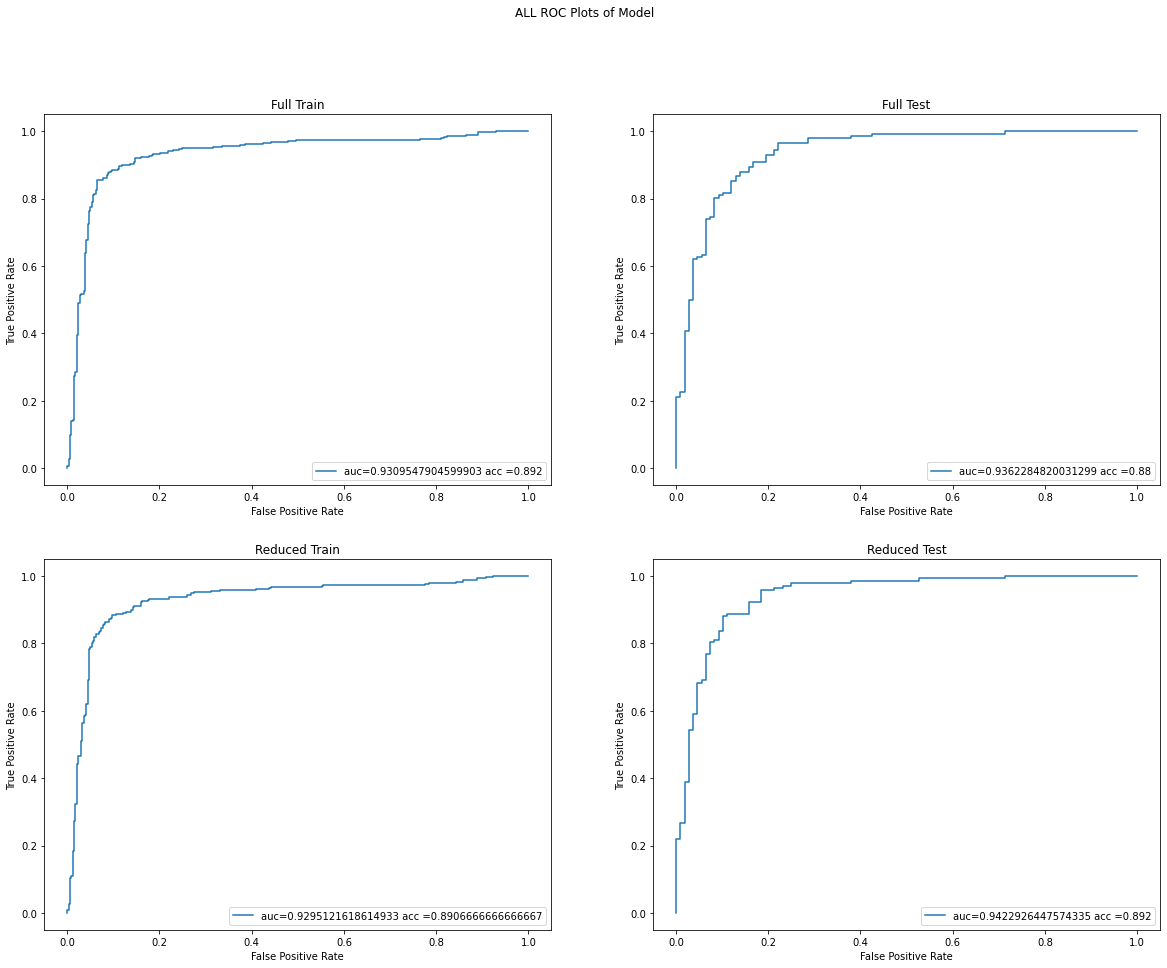

In [84]:
fig, axs = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('ALL ROC Plots of Model')
axs[0,0].plot(fpr1,tpr1,label="auc="+str(auc1)+" acc ="+str(a1))
axs[0,0].set_title('Full Train')

axs[0,1].plot(fpr2,tpr2,label="auc="+str(auc2)+" acc ="+str(a2))
axs[0,1].set_title('Full Test')

axs[1,0].plot(fpr3,tpr3,label="auc="+str(auc3)+" acc ="+str(a3))
axs[1,0].set_title('Reduced Train')

axs[1,1].plot(fpr4,tpr4,label="auc="+str(auc4)+" acc ="+str(a4))
axs[1,1].set_title('Reduced Test')

for ax in axs.flat:
    ax.set(xlabel='False Positive Rate', ylabel='True Positive Rate')
    ax.legend(loc=4)
plt.show()